<a href="https://colab.research.google.com/github/ISAWASHUN/deep-learning/blob/main/%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [6]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2022-08-26 01:45:14--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.224.250.7, 13.224.250.24, 13.224.250.5, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   246MB/s    in 0.2s    

2022-08-26 01:45:14 (246 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [7]:
!ls

hymenoptera_data.zip  sample_data


In [8]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [9]:
!ls

hymenoptera_data  hymenoptera_data.zip	sample_data


In [10]:
!ls hymenoptera_data 

train  val


In [12]:
!ls hymenoptera_data/train

ants  bees


In [14]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [15]:
train_dataset = datasets.ImageFolder("./hymenoptera_data/train", transform=transform)

In [17]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [18]:
data_iter = iter(train_loader)

In [19]:
imgs, labels = data_iter.next()

In [20]:
labels

tensor([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0])

In [21]:
imgs.size()

torch.Size([32, 3, 224, 224])

In [22]:
img = imgs[0]

In [23]:
img_permute = img.permute(1,2,0)

In [24]:
img_permute = 0.5 * img_permute + 0.5

In [25]:
img_permute = np.clip(img_permute,0, 1)

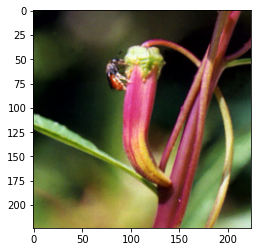

In [27]:
plt.imshow(img_permute)

In [28]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [29]:
for param in model.parameters():
  param.requires_grad = False

In [30]:
model.fc = nn.Linear(512, 2)

In [31]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [34]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.778042197227478, acc: 0.526562511920929
epoch: 1, loss: 0.5631401836872101, acc: 0.714062511920929
epoch: 2, loss: 0.4092838726937771, acc: 0.87109375
epoch: 3, loss: 0.3396885134279728, acc: 0.897656261920929
epoch: 4, loss: 0.28960707783699036, acc: 0.9312499761581421
epoch: 5, loss: 0.2504630908370018, acc: 0.9429687261581421
epoch: 6, loss: 0.2170748356729746, acc: 0.956250011920929
epoch: 7, loss: 0.2060306202620268, acc: 0.94921875
epoch: 8, loss: 0.17785990424454212, acc: 0.953125
epoch: 9, loss: 0.1934965644031763, acc: 0.953125
epoch: 10, loss: 0.1604813951998949, acc: 0.96875
epoch: 11, loss: 0.1528041586279869, acc: 0.9624999761581421
epoch: 12, loss: 0.1461154855787754, acc: 0.97265625
epoch: 13, loss: 0.13228912372142076, acc: 0.9742187261581421
epoch: 14, loss: 0.1332463389262557, acc: 0.96484375


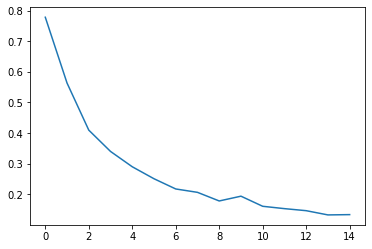

In [35]:
plt.plot(losses)